In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
df = pd.read_csv('/content/drive/MyDrive/Data/exams.csv')

In [36]:
df.head()

,Exam 1,Exam 2,Admitted = 1
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [37]:
X = df[['Exam 1','Exam 2']].values
y = df['Admitted = 1'].values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [43]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [44]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

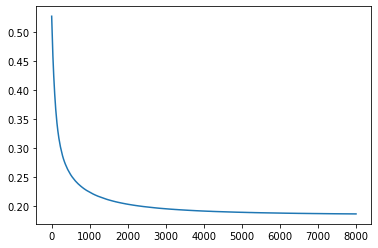

In [45]:
model = Sequential()
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='SGD',loss='binary_crossentropy')
model.fit(X_train_scaled,y_train,epochs=8000,verbose=0)
J_list = model.history.history['loss']
plt.plot(J_list)

In [46]:
J_train = model.evaluate(X_train_scaled,y_train)
J_test = model.evaluate(X_test_scaled,y_test)
print(J_train,J_test)

1/1 [==============================] - 0s 16ms/step - loss: 0.2908
0.18598762154579163 0.2907862067222595


In [47]:
predictions_test = model.predict_classes(X_test_scaled)
print(classification_report(y_test,predictions_test))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.80      0.89      0.84         9

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [48]:
predictions_train = model.predict_classes(X_train_scaled)
print(classification_report(y_train,predictions_train))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.92      0.94      0.93        51

    accuracy                           0.91        80
   macro avg       0.91      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80



/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(25.0, 100.0)

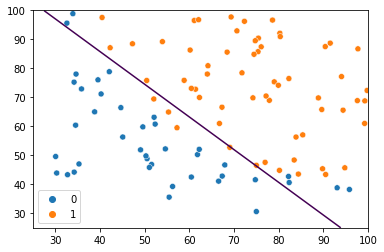

In [49]:
sns.scatterplot(X[:,0],X[:,1],hue=y)
xl, xr, dx = 25, 100, 0.1
yl, yr, dy = 25, 100, 0.1
u = np.arange(xl,xr,dx)
v = np.arange(yl,yr,dy)
u_r = np.ones((len(v),1))*u.reshape(1,len(u))
v_r = v.reshape(len(v),1)*np.ones((1,len(u)))
u_r = u_r.reshape(-1)
v_r = v_r.reshape(-1)
p_grid = np.column_stack((u_r,v_r))
p_grid_scaled = scaler.transform(p_grid)
f_grid = model.predict(p_grid_scaled)
f_grid = f_grid.reshape((len(v),len(u)))
plt.contour(u,v,f_grid,levels=[0.5])
plt.xlim(25,100)
plt.ylim(25,100)